# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.181378e+01     9.870895e+00
 * time: 0.002177000045776367
     1     3.011008e+01     5.567599e+00
 * time: 0.009013891220092773
     2     2.139950e+01     5.593874e+00
 * time: 0.016654014587402344
     3     1.657827e+01     5.224965e+00
 * time: 0.025249004364013672
     4     1.182497e+01     1.876204e+00
 * time: 0.033312082290649414
     5     1.138761e+01     2.659294e+00
 * time: 0.03926205635070801
     6     1.062140e+01     1.972147e+00
 * time: 0.04570603370666504
     7     9.893499e+00     1.547767e+00
 * time: 0.05213308334350586
     8     9.400374e+00     1.540797e+00
 * time: 0.05857110023498535
     9     8.960376e+00     1.600791e+00
 * time: 0.06446599960327148
    10     8.630369e+00     1.027981e+00
 * time: 0.07117009162902832
    11     8.405594e+00     9.925518e-01
 * time: 0.07755708694458008
    12     8.215028e+00     8.771012e-01
 * time: 0.08423399925231934
    13     8.060957e+00     4.831716e-01
 * 

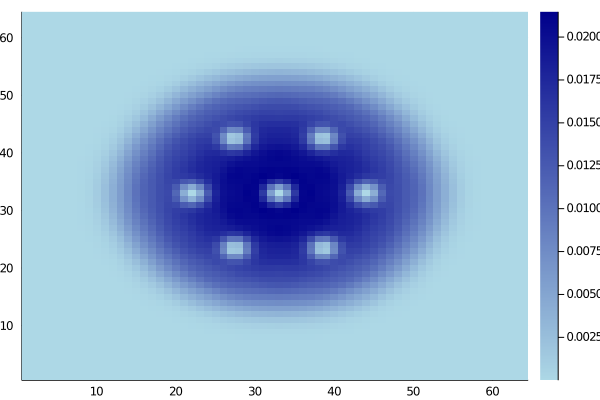

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)